## Loading the data



In [203]:
import os

os.listdir(r"K:\Projects\SickKids_Brain_Preprocessing\preprocessed_FLAIR_from_tumor_seg_dir")

['1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '139',
 '14',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '172',
 '173',
 '174',
 '175',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '212',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '22',
 '220',
 '222',
 '223',
 '225',
 '226',


In [204]:
os.chdir(
    r"K:\Projects\SickKids_Brain_Preprocessing\preprocessed_FLAIR_from_tumor_seg_dir")  # we could also use "cd" but that would not be a python command

In [205]:
os.getcwd()

'K:\\Projects\\SickKids_Brain_Preprocessing\\preprocessed_FLAIR_from_tumor_seg_dir'

In [206]:
os.listdir()

['1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '139',
 '14',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '172',
 '173',
 '174',
 '175',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '212',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '22',
 '220',
 '222',
 '223',
 '225',
 '226',


In [207]:
import glob


def load_image_data(path, patients, limit=False):
    data_images = {}
    for root, dirs, files in os.walk(path):
        dirs.sort(key=int)
        dirs = list(map(int, dirs))
        dirs = [patient for patient in dirs if patient in patients]
        if limit:
            dirs = dirs[:limit]
        for d in dirs:
            print(f"Loading Patient {d}...")
            np_filenames = glob.glob(f"{os.path.join(root, f'{d}')}/*/*.npy")
            FLAIR = None
            segmentation = None
            if "preprocessed_FLAIR" in np_filenames[0]:
                FLAIR = np.load(np_filenames[0])
            if "preprocessed_segmentation" in np_filenames[1]:
                segmentation = np.load(np_filenames[1])
            if FLAIR is not None and segmentation is not None:
                data_images[d] = [FLAIR, segmentation]
            else:
                print('Data missing.')
        break
    return data_images, dirs

In [208]:
excluded_patients = [2, 3, 4, 6, 7, 9, 11, 12, 13, 16, 21, 23, 25, 28, 29, 30, 33, 35, 36, 37, 38, 44, 45, 49, 50, 52,
                     53, 54, 55, 58, 59, 61, 63, 66, 73, 74, 75, 77, 78, 80, 84, 85, 86, 92, 95, 96, 98, 100,
                     102, 103, 105, 107, 108, 110, 113, 117, 121, 122, 123, 125, 128, 130, 131, 132, 136, 137, 138,
                     139, 140, 141, 142, 143, 147, 148, 150, 152, 156, 158, 159, 165, 166, 171, 173, 174, 176, 182,
                     183, 184, 187, 190, 191, 192, 194, 196, 199, 203, 204, 209, 210, 213, 221, 222, 224, 226, 227,
                     228, 232, 233, 234, 235, 237, 240, 242, 243, 245, 246, 250, 254, 255, 256, 258, 259, 260, 261,
                     263, 264, 266, 270, 272, 274, 277, 278, 283, 284, 285, 288, 293, 298, 299, 303, 306, 309, 311,
                     312, 317, 318, 319, 321, 322, 324, 325, 327, 328, 330, 332, 333, 334, 336, 337, 341, 343, 347,
                     349, 350, 351, 352, 354, 356, 359, 364, 367, 370, 371, 374, 376, 377, 378, 380, 383, 386, 387,
                     388, 392, 396]

In [209]:
import numpy as np
radiomics_patients_list = set(range(394,398))
final_inclusion_list = set([x for x in radiomics_patients_list if x not in excluded_patients])
patients_with_FLAIR = []
image_directory = r'K:\Projects\SickKids_Brain_Preprocessing\preprocessed_FLAIR_from_tumor_seg_dir'
for each_patient in os.listdir(image_directory):
    try:
        patients_with_FLAIR.append(int(each_patient))
    except:
        print("Patient not found.")
patients_with_FLAIR.sort(key=int)
patients_list = list(final_inclusion_list.intersection(patients_with_FLAIR))

images, patients_used = load_image_data(image_directory, patients=patients_list, limit=50)

Loading Patient 394...
Loading Patient 395...
Loading Patient 397...


In [210]:
data = {}
for each_patient in patients_used:
    image = images[each_patient][0]
    seg = images[each_patient][1]
    data[each_patient] = (image, seg)

In [211]:
flair_img = data[list(data.keys())[0]][0]
segmentation = data[list(data.keys())[0]][1]

In [212]:
flair_img.shape

(240, 240, 155)

In [213]:
segmentation.shape

(240, 240, 155)

unique values in the segmentation are: [0. 1.]


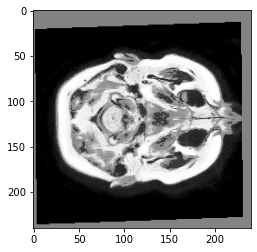

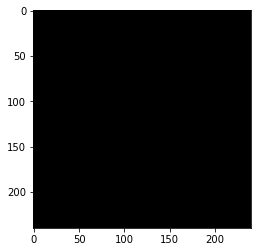

In [214]:
import matplotlib.pyplot as plt
import matplotlib

def plot_segmentation(seg):
    cmap = matplotlib.colors.ListedColormap(["black", "dimgrey", "forestgreen", "darkorange"])
    plt.figure()
    plt.imshow(seg, cmap=cmap, vmin=0, vmax=3)


plt.figure()
plt.imshow(flair_img[:, :, 4], cmap='gray')
plot_segmentation(segmentation[:, :, 4])

print("unique values in the segmentation are:", np.unique(segmentation))

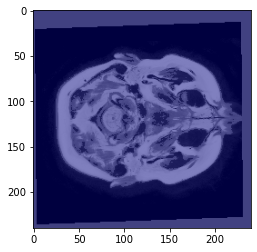

In [215]:
plt.imshow(flair_img[:,:,4], cmap='gray') # I would add interpolation='none'
plt.imshow(segmentation[:,:,4], cmap='jet', alpha=0.5) # interpolation='none'

minimum intensity value in the FLAIR image is: 0.6962972638040978
maximum intensity value in the FLAIR image is: 0.6962972638040978
Average intensity value in the FLAIR image is: 0.696297263804098


Text(0.5, 1.0, 'Histogram of intensities in the FLAIR image')

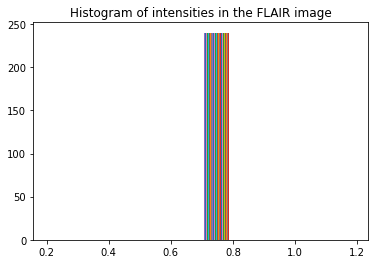

In [216]:
# Statistics of the image
import numpy as np

print("minimum intensity value in the FLAIR image is:", np.min(flair_img[4, :, :]))
print("maximum intensity value in the FLAIR image is:", np.max(flair_img[4, :, :]))
print("Average intensity value in the FLAIR image is:", np.mean(flair_img[4, :, :]))
plt.hist(flair_img[4, :, :])
plt.title("Histogram of intensities in the FLAIR image")

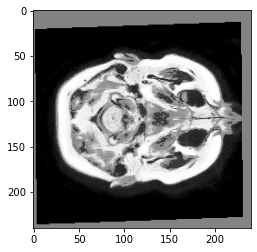

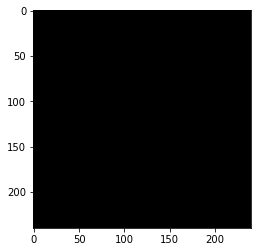

In [217]:
import copy
def seg_to_binary(seg):
    local_seg = copy.deepcopy(seg)
    local_seg[local_seg > 0] = 1
    return local_seg


seg = seg_to_binary(segmentation[:, :, 4])
plt.figure()
plt.imshow(flair_img[:, :, 4], cmap='gray')
plt.figure()
plt.imshow(seg, cmap='gray')

Text(0, 0.5, 'Surface Area')

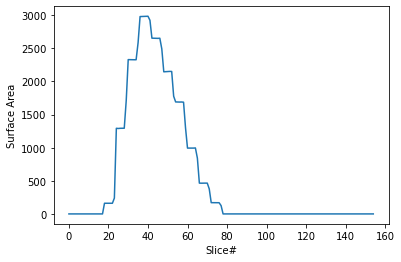

In [218]:
loc = []
tumor_area = []
for i in range(segmentation.shape[2]):
    loc.append(i)
    seg = seg_to_binary(segmentation[:, :, i])
    tumor_area.append(np.sum(seg))

plt.plot(loc, tumor_area)
plt.xlabel("Slice#")
plt.ylabel("Surface Area")

The index slice is located at loc# 40


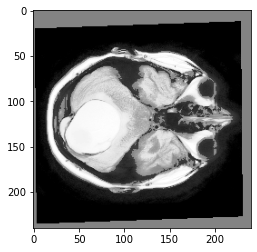

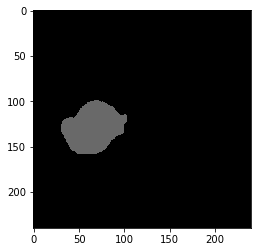

In [219]:
ind = np.argmax(tumor_area)

print("The index slice is located at loc#", ind)

def refine_seg(seg):
  local_seg = copy.deepcopy(seg)
  local_seg[local_seg==4] = 3
  return local_seg

seg = refine_seg(segmentation[:, :, ind])

plt.figure()
plt.imshow(flair_img[:, :, ind], cmap='gray')
plot_segmentation(seg)

In [220]:
import SimpleITK as sitk
from radiomics import featureextractor


def radiomics_extractor(img, msk):
    print(img.shape)
    img = img.transpose(2,0,1)
    print(img.shape)
    msk = msk.transpose(2,0,1)
    img_sitk = sitk.GetImageFromArray(img)
    print(img_sitk.GetSize())
    msk_sitk = sitk.GetImageFromArray(msk)
    print(msk_sitk.GetSize())

    extractor = featureextractor.RadiomicsFeatureExtractor()

    featureVector = extractor.execute(img_sitk, msk_sitk)

    return featureVector

seg = seg_to_binary(segmentation)
radiomics = radiomics_extractor(flair_img, seg)

print(type(radiomics))

(240, 240, 155)
(155, 240, 240)
(240, 240, 155)
(240, 240, 155)


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


<class 'collections.OrderedDict'>


In [221]:
print(len(radiomics.keys()))


129


In [222]:
# Extracting full set of radiomics
def radiomics_extractor(img, msk):
    img = img.transpose(2,0,1)
    msk = msk.transpose(2,0,1)
    img_sitk = sitk.GetImageFromArray(img)
    msk_sitk = sitk.GetImageFromArray(msk)

    extractor = featureextractor.RadiomicsFeatureExtractor()
    extractor.enableAllImageTypes()
    extractor.enableAllFeatures()

    featureVector = extractor.execute(img_sitk, msk_sitk)

    return featureVector


seg = seg_to_binary(segmentation)
radiomics = radiomics_extractor(flair_img, seg)

print(type(radiomics))
print(len(radiomics.keys()))

parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Could not load required package "skimage", cannot implement filter LBP 2D
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, t

<class 'collections.OrderedDict'>
1338


In [223]:
from IPython.display import clear_output

radiomics_results = []
for each_patient in data.keys():
    print(f"Computing features for {each_patient}...")
    mri_data = data[each_patient]
    flair_img = mri_data[0]
    seg = seg_to_binary(mri_data[1])
    radiomics = radiomics_extractor(flair_img, seg)
    updict = {"id" : each_patient}
    updict.update(radiomics)
    radiomics_results.append(updict)
    clear_output(wait=True)


Computing features for 397...


parameter force2D must be set to True to enable shape2D extraction
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Could not load required package "skimage", cannot implement filter LBP 2D
Could not load required package "scipy" or "trimesh", cannot implement filter LBP 3D
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, t

## Saving the results

In [224]:
import os
import LTRI_Funcs as LTRIf


LTRIf.list_of_dict_to_csv(radiomics_results, r"C:\Users\Justin\Documents\SickKids\pLGG\Data\radiomics_features_07-18-22.csv")

In [225]:
os.getcwd()

'K:\\Projects\\SickKids_Brain_Preprocessing\\preprocessed_FLAIR_from_tumor_seg_dir'